In [1]:
%load_ext kedro.ipython

[08/15/24 23:32:52] INFO     Using                                                                  ]8;id=399576;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=444436;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/framework/project/__init__.py#246\246]8;;\
                             '/home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/p                
                             ython3.11/site-packages/kedro/framework/project/rich_logging.yml' as                  
                             logging configuration.                                                                

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=877447;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=205867;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=269316;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=170937;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as: /mnt/c/Users/Winson Yeap/Documents/0         ]8;id=354544;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=5388;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             Python/Kaggle/bank-loan-defaulter-prediction.                                         
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/15/24 23:32:54] INFO     Kedro project Bank Loan Defaulter Prediction                           ]8;id=798046;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=78190;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=651880;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=771020;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=955850;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=681059;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [2]:
import logging

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

_logger = logging.getLogger(__name__)
_logger.setLevel(logging.DEBUG)

In [3]:
train_df = catalog.load("feature_engineered_train_dataset")
test_df = catalog.load("feature_engineered_test_dataset")

[08/15/24 23:32:55] INFO     Loading data from feature_engineered_train_dataset                 ]8;id=368770;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=72491;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py#537\537]8;;\
                             (FeatherDataset)...                                                                   

                    INFO     Loading data from feature_engineered_test_dataset                  ]8;id=187852;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=147579;file:///home/winsonyeap/miniconda3/envs/bank-loan-defaulter-prediction/lib/python3.11/site-packages/kedro/io/data_catalog.py#537\537]8;;\
                             (FeatherDataset)...                                                                   

### Settings & Parameters

In [4]:
NUMERIC_VARS = [
    'LOAN_AMOUNT', 'FUNDED_AMOUNT', 'FUNDED_AMOUNT_INVESTOR', 'TERM', 'INTEREST_RATE', 'DEBIT_TO_INCOME',
    'DELINQUENCY_TWO_YEARS', 'INQUIRES_SIX_MONTHS', 'OPEN_ACCOUNT', 'PUBLIC_RECORD', 'REVOLVING_BALANCE', 
    'REVOLVING_UTILITIES', 'TOTAL_ACCOUNTS', 'TOTAL_RECEIVED_INTEREST', 'TOTAL_RECEIVED_LATE_FEE', 'RECOVERIES',
    'COLLECTION_RECOVERY_FEE', 'COLLECTION_12_MONTHS_MEDICAL', 'LAST_WEEK_PAY', 'TOTAL_COLLECTION_AMOUNT',
    'TOTAL_CURRENT_BALANCE', 'TOTAL_REVOLVING_CREDIT_LIMIT', 
    'FUNDED_AMOUNT_TO_PRINCIPAL', 'FUNDED_AMOUNT_INVESTOR_TO_PRINCIPAL', 'RECEIVED_INTEREST_TO_PRINCIPAL', 'RECEIVED_LATE_FEE_TO_PRINCIPAL'
]

assert set(NUMERIC_VARS).issubset(set(train_df.columns)), f"There are missing columns in the dataset: {set(NUMERIC_VARS) - set(train_df.columns)}"

## Visualisation
---
### Histograms

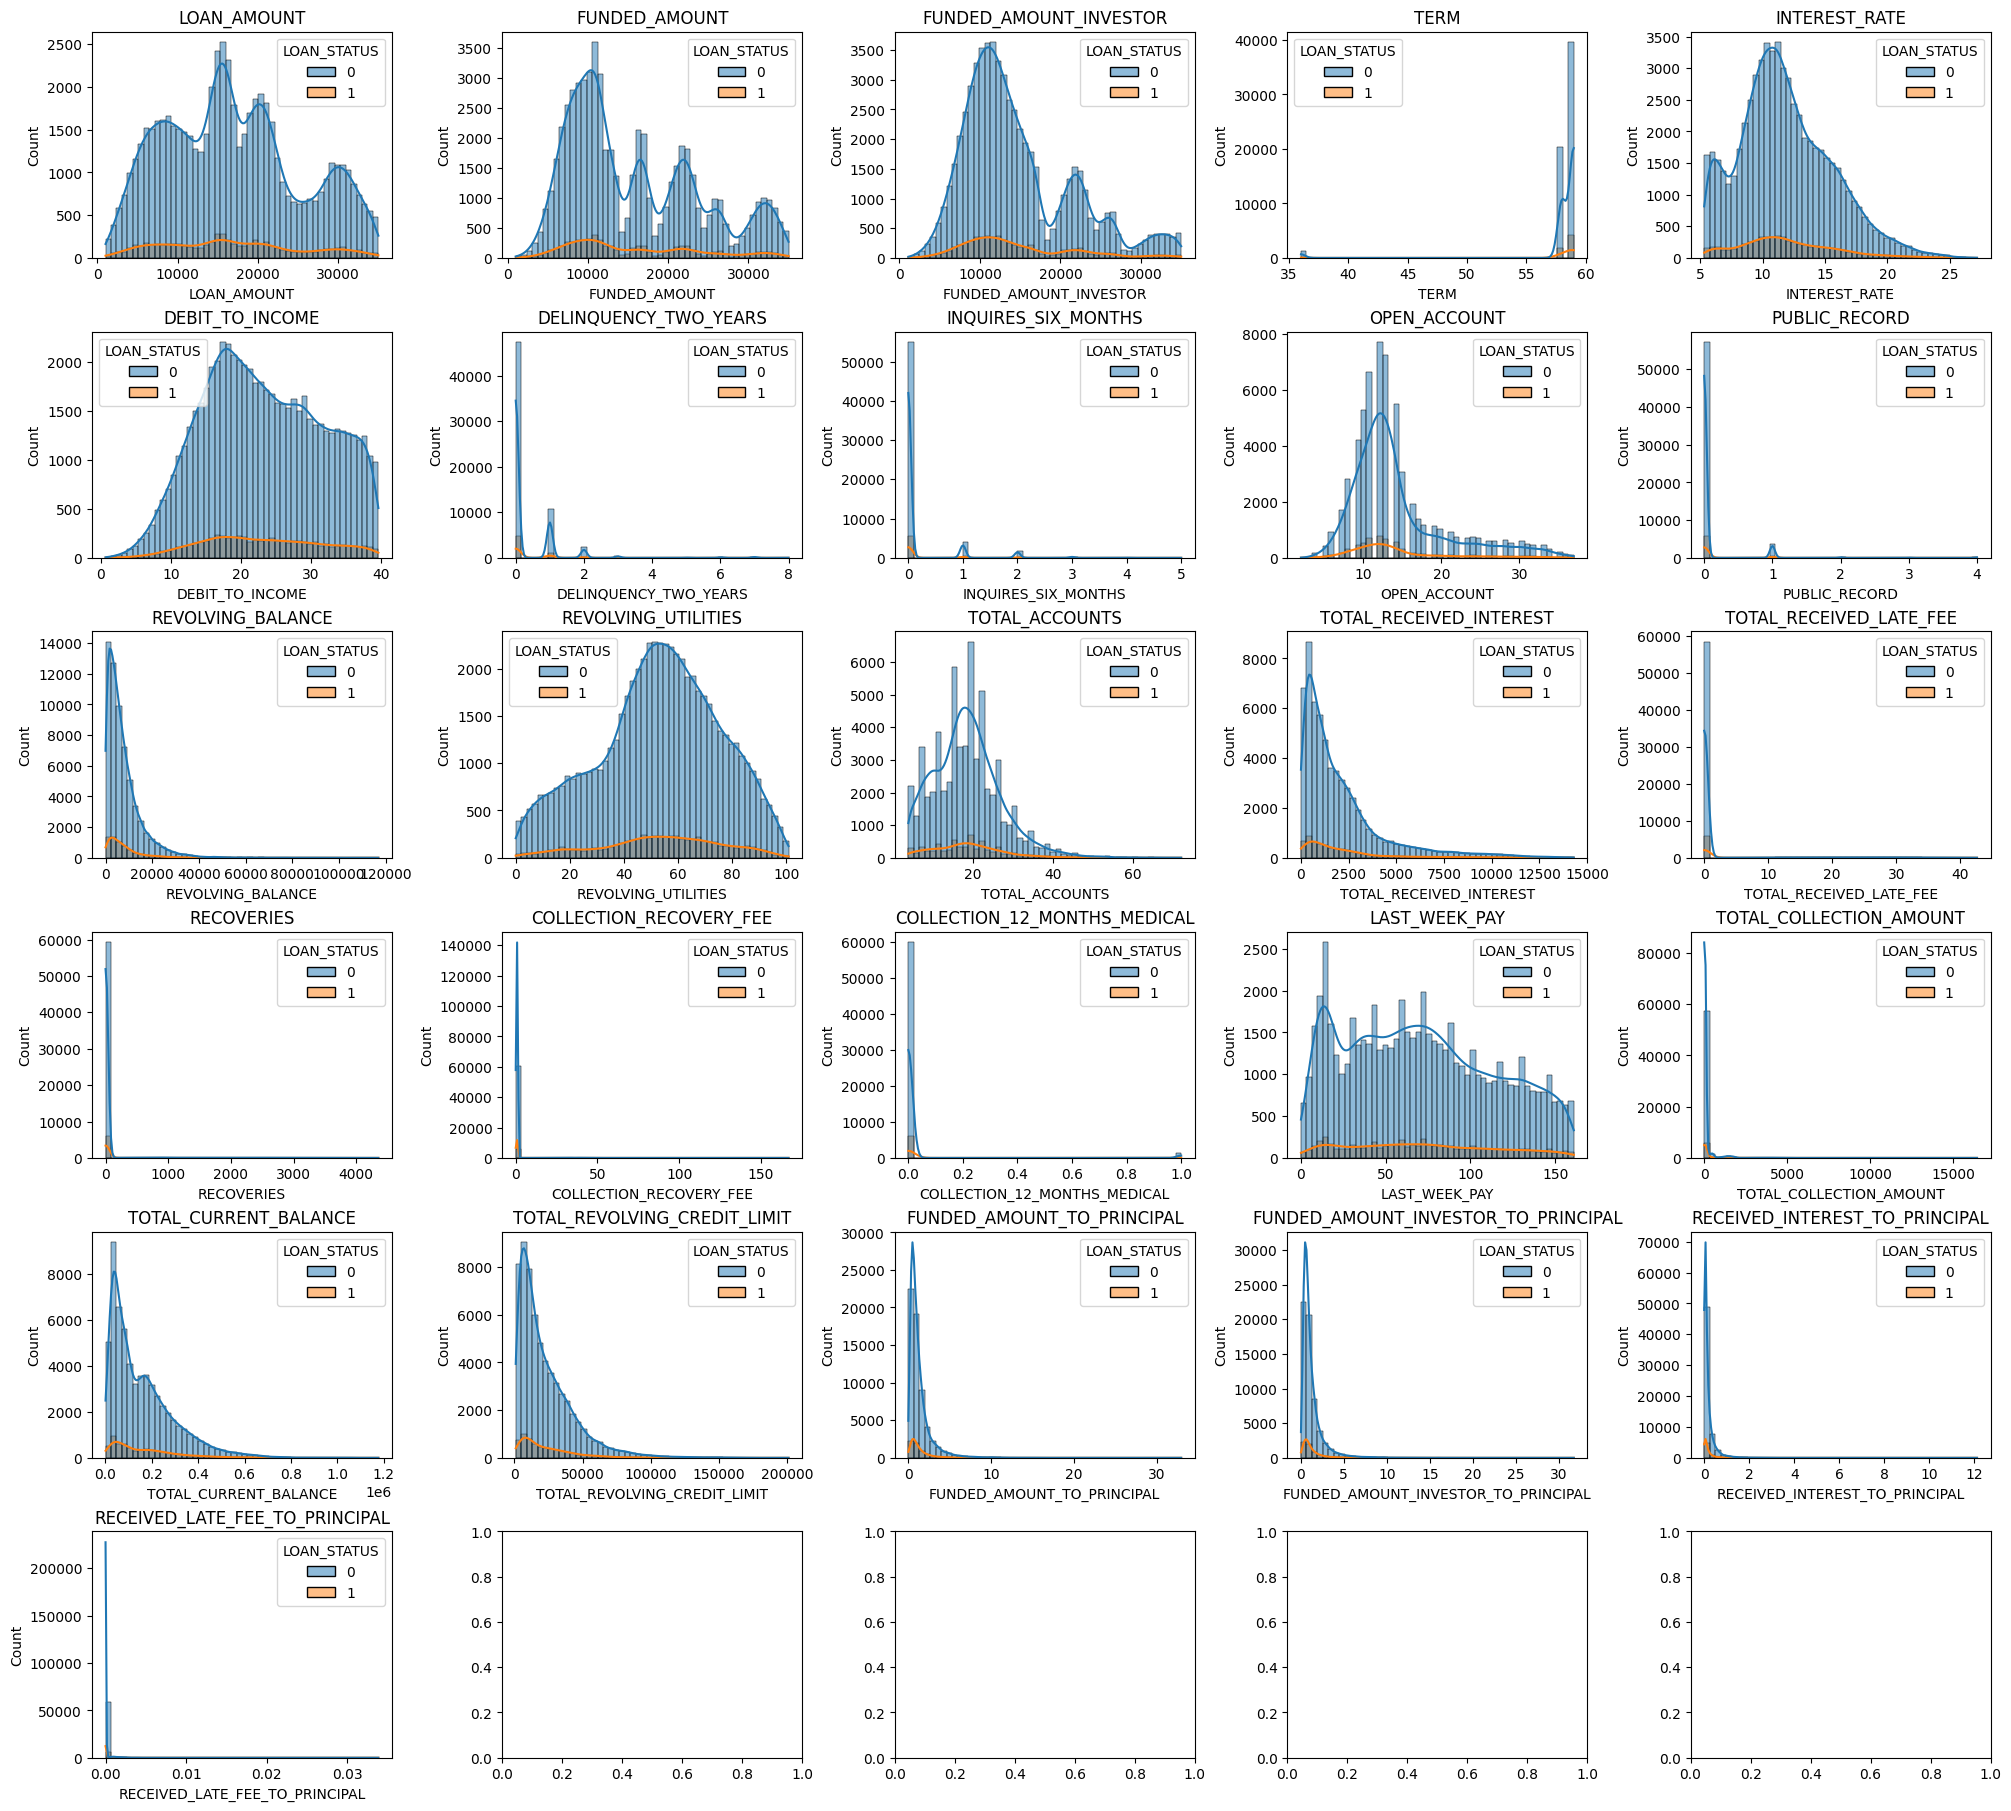

In [5]:
ncols = 5
nrows = len(NUMERIC_VARS) // ncols + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 3 * nrows), constrained_layout=True)
axes = axes.flatten()
for ax_id, var in enumerate(NUMERIC_VARS):
    ax = axes[ax_id]
    sns.histplot(data=train_df, x=var, hue='LOAN_STATUS', ax=ax, kde=True, bins=50)
    ax.set_title(var)

## Statstical Testing
---

### t-test for significance

In [6]:
from scipy.stats import ttest_ind

In [7]:
ttest_results = dict()
default_df = train_df.query("LOAN_STATUS == 1").copy()
non_default_df = train_df.query("LOAN_STATUS == 0").copy()
for var in NUMERIC_VARS:
    t_stat, p_val = ttest_ind(default_df[var], non_default_df[var])
    ttest_results[var] = p_val
    # _logger.info(f"[t-test] ({var}) t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
ttest_results = pd.DataFrame(ttest_results, index=['P_VALUE']).T.reset_index(drop=False).rename(columns={'index': 'FEATURE'}).sort_values(by='P_VALUE', ascending=True)

In [8]:
ttest_results.style.background_gradient(cmap='BuGn_r', subset=['P_VALUE'])

,FEATURE,P_VALUE
25,RECEIVED_LATE_FEE_TO_PRINCIPAL,0.003497
23,FUNDED_AMOUNT_INVESTOR_TO_PRINCIPAL,0.004905
9,PUBLIC_RECORD,0.005946
6,DELINQUENCY_TWO_YEARS,0.009463
20,TOTAL_CURRENT_BALANCE,0.010690
14,TOTAL_RECEIVED_LATE_FEE,0.014999
19,TOTAL_COLLECTION_AMOUNT,0.040370
8,OPEN_ACCOUNT,0.066207
22,FUNDED_AMOUNT_TO_PRINCIPAL,0.104428
18,LAST_WEEK_PAY,0.112115


In [17]:
def _agg_field(x):
    return pd.DataFrame({
        'MEAN': x.mean(),
        'MIN': x.min(),
        'Q05': x.quantile(0.05),
        'Q25': x.quantile(0.25),
        'MEDIAN': x.median(),
        'Q75': x.quantile(0.75),
        'Q95': x.quantile(0.95),
        'MAX': x.max(),
    })

significant_features = ttest_results.query("P_VALUE < 0.05")['FEATURE'].unique()
train_df.groupby('LOAN_STATUS')[significant_features].apply(lambda x: _agg_field(x))\
    .reset_index().sort_values(['level_1', 'LOAN_STATUS']).set_index(['level_1', 'LOAN_STATUS'])\
    .style.format("{:.2f}")

<pandas.io.formats.style.Styler object at 0x7faf25e79e90>